# Курс Python. Занятие 3. Работа с файлами разного формата

# Содержание



[Часть 1. Стандартная работа с файлами](#Часть-1.-Стандартная-работа-с-файлами)

* [Встроенная функция open и ключевое слово with](#Встроенная-функция-open-и-ключевое-слово-with)
* [Запись в файл](#Запись-в-файл)
* [Чтение из файла](#Чтение-из-файла)
* [Модуль работы с  файловой системой: os и os.path](#Модуль-работы-с--файловой-системой:-os-и-os.path)
* [Модуль операций с файлами: shutil](#Модуль-операций-с-файлами:-shutil)

[Часть 2. Работа с различными форматами файлов](#Часть-2.-Работа-с-различными-форматами-файлов)

* [Формат Comma-Separated Values: csv](#Формат-Comma-Separated-Values:-csv
)
* [Формат JavaScript Object Notation: json](#Формат-JavaScript-Object-Notation:-json)
* [Форматы архивных файлов: zip, gzip, tar](#Форматы-архивных-файлов:-zip,-gzip,-tar)
* [Работа с изображениями](#Работа-с-изображениями)
* [Формат HyperText Markup Language и eXtensible Markup Language: html и xml](#Формат-HyperText-Markup-Language-и-eXtensible-Markup-Language:-html-и-xml)
* [Получение данных из Интернет: модуль requests](#Получение-данных-из-Интернет:-модуль-requests)

[Часть 3. Практика](#Часть-3.-Практика)

## Часть 1. Стандартная работа с файлами

### Встроенная функция open и ключевое слово with

Встроенная функция `open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)` служит для открытия указанного файла `file` (в общем случае - потока) в указанном режиме `mode` в соответствующей кодировке `encoding`. <br><br>
По умолчанию файлы открываются в текстовом режиме на чтение в кодировке, являющейся кодировкой по умолчанию для операционной системы.<br><br>
Ключевое слово `with` объявляет менеджер контекста, который обеспечивает обработку ошибок и правильное завершение работы с объектами в рамках контекста. Подробнее потом.

In [1]:
# Работа с файлами курильщика

f = open('workfile.txt', 'w')

f.close()    # Файл обязательно нужно закрыть по завершении работы с ним

print(f)
print(type(f))
print([s for s in dir(f) if not s.startswith('_')])

<_io.TextIOWrapper name='workfile.txt' mode='w' encoding='cp1251'>
<class '_io.TextIOWrapper'>
['buffer', 'close', 'closed', 'detach', 'encoding', 'errors', 'fileno', 'flush', 'isatty', 'line_buffering', 'mode', 'name', 'newlines', 'read', 'readable', 'readline', 'readlines', 'reconfigure', 'seek', 'seekable', 'tell', 'truncate', 'writable', 'write', 'write_through', 'writelines']


In [77]:
# Работа с файлами здорового человека

with open('workfile.txt', 'w') as f:
    f.write('Hello')


'1 2 one'

Возможные режимы открытия файлов:
- `'r'`	- открытие на чтение (является значением по умолчанию).
- `'w'`	- открытие на запись, содержимое файла удаляется, если файла не существует, создается новый.
- `'x'`	- открытие на запись, если файла не существует, иначе исключение.
- `'a'`	- открытие на дозапись, информация добавляется в конец файла.
- `'b'`	- открытие в двоичном режиме.
- `'t'`	- открытие в текстовом режиме (является значением по умолчанию).
- `'+'` - открытие на чтение и запись
- а также их комбинации: `rt`, `rb`, `wb`, `ab` и т.д

### Запись в файл

In [3]:
# Зададим строчки в виде списка

lines = [
    'Line 1\n',
    'Line 2\n',
    'Line 3\n',
]

# Итерируясь по списку запишем построчно

with open('workfile.txt', 'wt') as f:
    for line in lines:
        f.write(line)

In [4]:
# Запишем все строки стразу

with open('workfile.txt', 'wt') as f:
    f.writelines(lines)

### Чтение из файла

Есть 4 варианта чтения информации из файла:
- метод `read(n)` читает указанное количество байт или файл целиком и возвращает строку
- метод `readline()` читает очередную строку из файла и возвращает её (`''` - если достигнут конец файла)
- метод `readlines(n)` читает указанное количество строк или все строки в список
- использование переменной файла в цикле for (итерация по строкам файла)

In [5]:
# Метод read - читает указанное количество байт или весь файл целиком в строку

with open('workfile.txt') as f:
    
    lines = f.read()
    print(type(lines))
    
    print(lines)
    

<class 'str'>
Line 1
Line 2
Line 3



In [6]:
# Метод readline - читает очередную строку из файла

with open('workfile.txt') as f:
    
    line = f.readline()
    print(line)

    while line:
        line = f.readline()
        print(line)

Line 1

Line 2

Line 3




In [7]:
# Метод readlines - читает указанное количество строк и возвращает список из них

with open('workfile.txt') as f:

    lines = f.readlines(2)
    print(lines)

['Line 1\n']


In [8]:
# Объект 'файл' является итератором

with open('workfile.txt') as f:
    
    for line in f:
        print(line)

Line 1

Line 2

Line 3



In [9]:
# Или сразу в список

with open('workfile.txt') as f:
    
    lines = list(f)
    print(lines)

['Line 1\n', 'Line 2\n', 'Line 3\n']


### Модуль работы с  файловой системой: os и os.path

os - встроенный модуль для работы с операционной системой и файловой системой на низком уровне<br>
os.path - дополнительные инструменты для работы с путями<br><br>
Все возможности модуля os - в [документации](https://docs.python.org/3/library/os.html).

In [10]:
import os        # os.path импортируется тоже

In [11]:
# Получим название операционной системы

print(os.name)

# Текущую директорию

print(os.getcwd())

# Текущего пользователя

print(os.getlogin())

# Переменную среды path

print(os.getenv('PATH'))

# И т.д.

nt
D:\_FORSSD\Dropbox\ДВФУ\python_fefu\lectures
pikvic
C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\Program Files\Git\cmd;C:\Program Files\TortoiseGit\bin;C:\WINDOWS\System32\OpenSSH\;C:\Program Files\Microsoft VS Code\bin;C:\Program Files\Intel\WiFi\bin\;C:\Program Files\Common Files\Intel\WirelessCommon\;C:\Users\pikvic\Anaconda3\Scripts;C:\Users\pikvic\Anaconda3;C:\Users\pikvic\Anaconda3;C:\Users\pikvic\Anaconda3\Library\mingw-w64\bin;C:\Users\pikvic\Anaconda3\Library\usr\bin;C:\Users\pikvic\Anaconda3\Library\bin;C:\Users\pikvic\Anaconda3\Scripts;C:\Users\pikvic\AppData\Local\Microsoft\WindowsApps;C:\Program Files\Microsoft VS Code\bin


In [12]:
# os.listdir - список файлов и папок в указанной директории (дефол - текущая)

print(os.listdir('C:'))

['$Recycle.Bin', '$WINRE_BACKUP_PARTITION.MARKER', 'Config.Msi', 'Documents and Settings', 'hiberfil.sys', 'Intel', 'mp3DirectCut', 'pagefile.sys', 'PerfLogs', 'Program Files', 'Program Files (x86)', 'ProgramData', 'Recovery', 'swapfile.sys', 'System Volume Information', 'Users', 'WebServers', 'Windows', 'Безымянный.jpg']


In [18]:
# os.scandir - итератор по списку файлов и папок в указанной директории (дефолт - текущая)

with os.scandir() as it:
    for entry in it:
        if not entry.name.startswith('.') and entry.is_file():
            print(entry.name)

lecture0.ipynb
lecture1.ipynb
lecture2.ipynb
lecture3.ipynb
workfile.txt


In [20]:
# os.stat - статистика файла или директории

print(os.stat(os.getcwd()))

os.stat_result(st_mode=16895, st_ino=1688849860376846, st_dev=2419595576, st_nlink=1, st_uid=0, st_gid=0, st_size=4096, st_atime=1543463581, st_mtime=1543463576, st_ctime=1543043029)


In [ ]:
# os.walk - рекурсивный список файлов и директорий

for root, dirs, files in os.walk(os.ge):
    print(root)
    print(dirs)
    print(files)
    print('-'*80)
`

In [14]:
# os.path - дополнительные функции для работы с путями и файлами

path = os.getcwd()
file = 'workfile.txt'

# Основные функции

# join - соединяет путь до файла и имя файла

full_path = os.path.join(path, file)

print(full_path)

D:\_FORSSD\Dropbox\ДВФУ\python_fefu\lectures\workfile.txt


In [15]:
# split - разделяет путь до файла на путь и имя

path, file = os.path.split(full_path)

print(path)
print(file)

D:\_FORSSD\Dropbox\ДВФУ\python_fefu\lectures
workfile.txt


In [16]:
# splitext - разделяет путь с именем файла и расширение

name, ext = os.path.splitext(full_path)

print(name)
print(ext)

D:\_FORSSD\Dropbox\ДВФУ\python_fefu\lectures\workfile
.txt


In [17]:
# getsize - возвращает размер файла в байтах

print(os.path.getsize(full_path))

24


In [18]:
# isdir, isfile - говорят сами за себя

print(os.path.isdir(full_path), os.path.isfile(full_path))

False True


In [19]:
# К вопросу о путях

root = os.getcwd()
print(root)

new_root = root.replace('\\', '/')
new_path = os.path.join(new_root, file)

print(new_path)

with open(new_path) as f:
    print(f.read())

D:\_FORSSD\Dropbox\ДВФУ\python_fefu\lectures
D:/_FORSSD/Dropbox/ДВФУ/python_fefu/lectures\workfile.txt
Line 1
Line 2
Line 3



### Модуль операций с файлами: shutil

Модуль shutil содержит набор функций высокого уровня для обработки файлов, групп файлов, и папок. В частности, доступные здесь функции позволяют копировать, перемещать и удалять файлы и папки. Часто используется вместе с модулем os.

In [20]:
import shutil

# Например, копирование файла

shutil.copy('workfile.txt', 'workfile_copy.txt')

'workfile_copy.txt'

In [21]:
# Провеcрим результат

print(os.listdir())

with open('workfile_copy.txt') as f:
    print(f.read())

['.ipynb_checkpoints', 'lecture0.ipynb', 'lecture1.ipynb', 'lecture2.ipynb', 'lecture3.ipynb', 'workfile.txt', 'workfile_copy.txt']
Line 1
Line 2
Line 3



In [22]:
# Перемещение файла - копирование с новым именем и удаление исходника

shutil.move('workfile_copy.txt', 'workfile_moved.txt')

'workfile_moved.txt'

In [23]:
# Проверим результат

print(os.listdir())

with open('workfile_moved.txt') as f:
    print(f.read())

['.ipynb_checkpoints', 'lecture0.ipynb', 'lecture1.ipynb', 'lecture2.ipynb', 'lecture3.ipynb', 'workfile.txt', 'workfile_moved.txt']
Line 1
Line 2
Line 3



## Часть 2. Работа с различными форматами файлов

### Формат Comma-Separated Values: csv
Формат файлов Comma-Separated Values (значения, разделённые запятыми) - один из самых популярных форматов хранения табличных данных. Для работы с файлами формата csv используется встроенный модуль csv.<br><br>
На практике при работе с табличными данными используются более высокоуровневые пакеты и csv файлы (как и многие другие форматы) читаются с помощью них.<br><br>
Подробнее о модуле csv - в [документации](https://docs.python.org/3/library/csv.html).

In [24]:
# Импорт модуля и подготовка файла

import csv

csvdata = [
    ['id','name','price'],
    [1,'Geforce 2080ti',100500],
    [2,'Geforce 1060',350],
    [3,'Radeon 580',400],
]    

In [26]:
# Запишем данные в файл с помощью модуля. Для этого используем класс csv.writer.

with open('pricelist.csv', 'wt', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(csvdata)
    
# Проверим содержимое
    
with open('pricelist.csv') as f:
    print(f.read())

id,name,price
1,Geforce 2080ti,100500
2,Geforce 1060,350
3,Radeon 580,400



In [35]:
# Прочитаем данные - для этого создадим объект класса csv.reader

with open('pricelist.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['id', 'name', 'price']
['1', 'Geforce 2080ti', '100500']
['2', 'Geforce 1060', '350']
['3', 'Radeon 580', '400']
['4', 'Radeon Vega', '100500']
['4', 'Radeon Vega', '100500']
[]
['4', 'Radeon Vega', '100500']
[]
['4', 'Radeon Vega', '100500']


In [34]:
# Добавим элемент в csv файл

new_item = [4, 'Radeon Vega', 100500]

with open('pricelist.csv', 'at', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(new_item)

### Формат JavaScript Object Notation: json

JSON - текстовый формат файлов, созданный для удобства хранения разнообразной информации в виде упорядоченных коллекций значений (массивов) и/или именованных коллеций ключ:значение (словари). В качестве значений могут выступать следующие типы данных:
* **Объект** — это неупорядоченное множество пар ключ:значение, заключённое в фигурные скобки «{ }». Ключ описывается строкой, между ним и значением стоит символ «:». Пары ключ-значение отделяются друг от друга запятыми
* **Массив** (одномерный) — это упорядоченное множество значений. Массив заключается в квадратные скобки «[ ]». Значения разделяются запятыми
* **Число**
* **Литералы true, false и null**
* **Строка** — это упорядоченное множество из нуля или более символов юникода, заключённое в двойные кавычки. Символы могут быть указаны с использованием escape-последовательностей, начинающихся с обратной косой черты «\» (поддерживаются варианты \', \", \\, \/, \t, \n, \r, \f и \b), или записаны шестнадцатеричным кодом в кодировке Unicode в виде \uFFFF.
<br><br>
**Лучше один раз увидеть:**
```
{
   "firstName": "Иван",
   "lastName": "Иванов",
   "address": {
       "streetAddress": "Московское ш., 101, кв.101",
       "city": "Ленинград",
       "postalCode": "101101"
   },
   "phoneNumbers": [
       "812 123-1234",
       "916 123-4567"
   ]
}
```

В Питоне для работы с файлами в формате JSON есть встроенный модуль json.

In [37]:
# Импортируем модуль и задаём тестовые данные в виде словаря

import json

data_dict = {
    "firstName": "Иван",
    "lastName": "Иванов",
    "address": {
        "streetAddress": "Московское ш., 101, кв.101",
        "city": "Ленинград",
        "postalCode": "101101"
    },
    "phoneNumbers": [
        "812 123-1234",
        "916 123-4567"
    ]
}

In [38]:
# Конвертируем словарь с данными в JSON и сохраним в файл

with open('data.json', 'w') as f:
    json.dump(data_dict, f)

In [39]:
# Считываем JSON файл и конвертируем данные обратно в словарь

with open('data.json') as f:
    decoded = json.load(f)
    print(decoded)

{'firstName': 'Иван', 'lastName': 'Иванов', 'address': {'streetAddress': 'Московское ш., 101, кв.101', 'city': 'Ленинград', 'postalCode': '101101'}, 'phoneNumbers': ['812 123-1234', '916 123-4567']}


In [41]:
# Можно работать как со строками

json.dumps(data_dict)

'{"firstName": "\\u0418\\u0432\\u0430\\u043d", "lastName": "\\u0418\\u0432\\u0430\\u043d\\u043e\\u0432", "address": {"streetAddress": "\\u041c\\u043e\\u0441\\u043a\\u043e\\u0432\\u0441\\u043a\\u043e\\u0435 \\u0448., 101, \\u043a\\u0432.101", "city": "\\u041b\\u0435\\u043d\\u0438\\u043d\\u0433\\u0440\\u0430\\u0434", "postalCode": "101101"}, "phoneNumbers": ["812 123-1234", "916 123-4567"]}'

In [45]:
with open('data.json') as f:
    data_json = f.read()
    print(json.loads(data_json))

{'firstName': 'Иван', 'lastName': 'Иванов', 'address': {'streetAddress': 'Московское ш., 101, кв.101', 'city': 'Ленинград', 'postalCode': '101101'}, 'phoneNumbers': ['812 123-1234', '916 123-4567']}


### Форматы архивных файлов: zip, gzip, tar

In [46]:
import zipfile

In [47]:
# Создание архива

with zipfile.ZipFile('data.zip', 'w') as f:
    f.write('data.json')

In [49]:
# Чтение архива

with zipfile.ZipFile('data.zip') as fzip:
    for file in fzip.filelist:
        print(file.filename)
        with fzip.open(file.filename) as f:
            print(json.loads(f.read()))

data.json
{'firstName': 'Иван', 'lastName': 'Иванов', 'address': {'streetAddress': 'Московское ш., 101, кв.101', 'city': 'Ленинград', 'postalCode': '101101'}, 'phoneNumbers': ['812 123-1234', '916 123-4567']}


### Работа с изображениями

Обработка изображений - отдельная большая область знаний, изучение которой требует отдельных курсов. Поэтому рассмотрим только основные операции на примерах.<br><br>
Для Питона существует множество пакетов и модулей по работе с изображениями. Pillow (PIL) - одна из самых популярных, простых, но функциональных библиотек для работы с изображениями в Питоне.

In [50]:
# Скачаем файл с изображением
import requests

url  =  'https://www.python.org/static/img/python-logo@2x.png'

response = requests.get(url)
with open('python.png', 'wb') as f:
    f.write(response.content)

In [51]:
# Импортируем класс для работы с изображениями

from PIL import Image

# А это чтобы показывать изображения в ноутбуке

from IPython.display import Image as Img, display


PNG (580, 164) RGBA


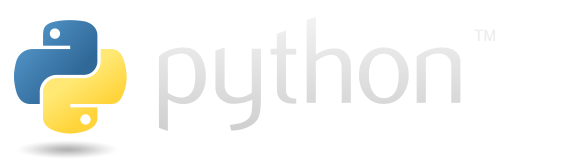

In [52]:
# С помощью контекстного менеджера откроем изображение и выведем информацию о нём

with Image.open('python.png') as im:
    
    print(im.format, im.size, im.mode)
    
    # Отобразим в ноутбуке

    display(Img(filename='python.png'))
    

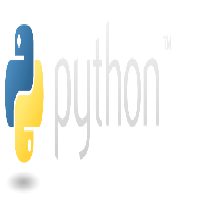

In [54]:
# Можно делать уменьшенные изображения

im = Image.open('python.png')

resized = im.resize((200, 200))

resized.save('resized.png')

# Отобразим в ноутбуке

display(Img(filename='resized.png'))

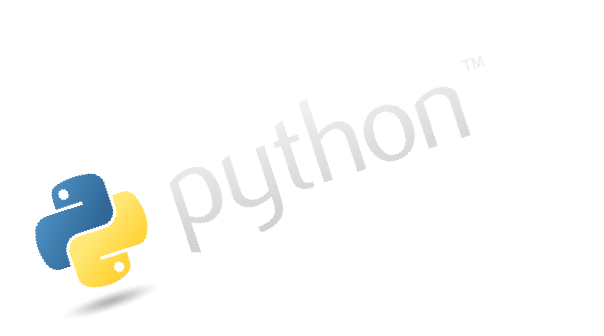

In [55]:
# Поворот изображения

rotated = im.rotate(18, expand=True)

rotated.save('rotated.png')

display(Img(filename='rotated.png'))

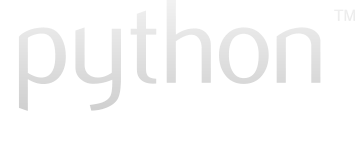

In [56]:
# Обрезка изображения

box = (140, 20, 500, 180)

cropped = im.crop(box)

cropped.save('cropped.png')

display(Img(filename='cropped.png'))

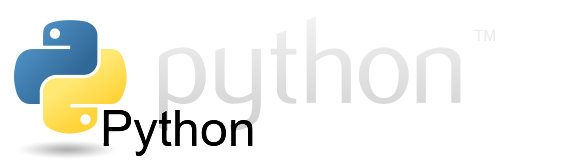

In [58]:
# Изменять изображения (например, наносить текст)

from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(im)

font = ImageFont.truetype('arial.ttf', size=50)

draw.text((100, 100), 'Python', (0, 0, 0), font=font)

im.save('drawn.png')

display(Img(filename='drawn.png'))

### Формат HyperText Markup Language и eXtensible Markup Language: html и xml

HTML и XML - языки разметки, определяющие структуру, параметры и/или внешнее представление документа. Разметка - это иерархическа структура элементов - "тегов" - которые написаны по определённым правилам.<br><br>
Файлы в формате HTML и XML - просто текстовые файлы. Однако получение иерархии тегов с их свойстами - нетривиальна задача. Поскольку html и xml имеют общие правила разметки, то для их разбора в Питоне используется, в частности, **модуль bs4** (от BeautifulSoup 4).

**Примеры файлов:**
* **HTML**
```
<!DOCTYPE html>
<html>
   <head>
      <meta charset="utf-8" />
      <title>HTML Document</title>
   </head>
   <body>
      <p>
         <b>
            Этот текст будет полужирным, <i>а этот — ещё и курсивным</i>.
         </b>
      </p>
   </body>
</html>
```
* **XML**
```
<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE recipe>
<recipe name="хлеб" preptime="5min" cooktime="180min">
   <title>
      Простой хлеб
   </title>
   <composition>
      <ingredient amount="3" unit="стакан">Мука</ingredient>
      <ingredient amount="0.25" unit="грамм">Дрожжи</ingredient>
      <ingredient amount="1.5" unit="стакан">Тёплая вода</ingredient>
   </composition>
   <instructions>
     <step>
        Смешать все ингредиенты и тщательно замесить. 
     </step>
     <step>
        Закрыть тканью и оставить на один час в тёплом помещении. 
     </step>
     <step>
        Замесить ещё раз, положить на противень и поставить в духовку.
     </step>
   </instructions>
</recipe>
```


In [59]:
# Импортируем модуль и рассмотрим на примере html (с xml всё то же)
 
from bs4 import BeautifulSoup

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [60]:
# Создаём объект BeautifulSoup, который содержит иерархическую структуру html тегов

soup = BeautifulSoup(html_doc, 'html.parser')

In [61]:
# Выберем все теги <a></a> - получим список объектов-тегов

links = soup.select('a')

# Пройдём по списку и распечатаем объекты теги, их тип и значение атрибута href

for link in links:
    print(link, type(link))
    print(link['href'])
    print(link.text)
    

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a> <class 'bs4.element.Tag'>
http://example.com/elsie
Elsie
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> <class 'bs4.element.Tag'>
http://example.com/lacie
Lacie
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a> <class 'bs4.element.Tag'>
http://example.com/tillie
Tillie


In [65]:
# Другой пакет для парсинга html и xml - lxml

from lxml import html

tree = html.fromstring(html_doc)

In [66]:
# Он использует язык XPath

links = tree.xpath('//a/text()')
print(links)

['Elsie', 'Lacie', 'Tillie']


### Получение данных из Интернет: модуль requests

In [67]:
import requests

In [68]:
url = 'https://newsvl.ru'
response = requests.get(url)

print(response)
print(response.text[:1000])

<Response [200]>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html class="is-responsive" xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://ogp.me/ns#"><head><meta http-equiv="Content-Type" content="text/html; charset=windows-1251" /><title>Новости Владивостока на VL.ru</title><meta name="description" content="Новости Владивостока и Приморского края. Фото и видеорепортажи." /><meta name="keywords" content=",новости сегодня,последние новости,новости дня,бизнес новости,новости онлайн,новости владивосток фото,новости приморья"/><meta name="yandex-verification" content="8058960f1f85b9d6" /> <meta name="yandex-verification" content="58c0aba208539cf9" /> <meta name="google-site-verification" content="ozgDbND74hDl6cyxKP071qkJJoOdrG-IcKSbaKrIRhY" /> <meta name="google-site-verification" content="uL4gMb2BZTmwVeXbB30DAXIHT7w5MeuGtOjiyEeDtl4" /> <meta name="candy.config" content='{"id":9,"geoc":4,"geor":25,"b":1,"bc":

In [82]:
soup = BeautifulSoup(response.text, 'html.parser')

news = soup.select('h4.story-list__item-title > a')
print(news[0])
for item in news:
    print(item, type(item.text))

<a href="/vlad/2018/11/29/175829/" title="Pizza Prosto угостит жителей Владивостока пиццей «Пепперони» всего за 99 рублей">Pizza Prosto угостит жителей Владивостока пиццей «Пепперони» всего за 99 рублей</a>
<a href="/vlad/2018/11/29/175829/" title="Pizza Prosto угостит жителей Владивостока пиццей «Пепперони» всего за 99 рублей">Pizza Prosto угостит жителей Владивостока пиццей «Пепперони» всего за 99 рублей</a> <class 'str'>
<a href="/sport/2018/11/29/175923/" title="Училище олимпийского резерва могут перенести с «Молодежной» на Русский, а беговую дорожку вдоль озера Юность – передать в краевую собственность">Училище олимпийского резерва могут перенести с «Молодежной» на Русский, а беговую дорожку вдоль озера Юность – передать в краевую собственность</a> <class 'str'>
<a href="/vlad/2018/11/29/175921/" title="Администрация Владивостока снова разрешила строить жилой комплекс на землях ДВО РАН">Администрация Владивостока снова разрешила строить жилой комплекс на землях ДВО РАН</a> <class 

In [74]:
tree = html.fromstring(response.text)

news = tree.xpath('//h4[@class="story-list__item-title"]/a/text()')

for item in news:
    print(item)

Pizza Prosto угостит жителей Владивостока пиццей «Пепперони» всего за 99 рублей
Училище олимпийского резерва могут перенести с «Молодежной» на Русский, а беговую дорожку вдоль озера Юность – передать в краевую собственность


## Часть 3. Практика

В качестве практики позанимаемся парсингом веб-страниц (извлечением нужной информации из них). Эта задача часто возникает на практике, когда в автоматическом режиме необходимо добыть большое количество структурированной информации из источников, не предназначенных для этого.<br><br>
Результаты парсинга обычно сохраняют в файл (например, csv) или в базу данных. Мы будем сохранять в csv.

In [ ]:
# Практика - парсинг сайта

